In [96]:
%load_ext autoreload

%autoreload 2

import importlib
import matplotlib.pyplot as plt
import pandas as pd
import pdb
import math
import numpy as np
import katpivot as kp 
#importlib.reload(kp)
 
data = pd.read_csv("Facebook_ads-PIVOT_2021.csv", sep=";")
data = kp.clean_data_ads(data)
stories, _ = kp.read_clean_stories(data, "PIVOT story pipeline.xlsx", sheetname="Completed")
#write to file 
data.to_excel("Facebook_ads_PIVOT_2021_mod.xlsx")
stories.to_excel("story_chara.xlsx")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
#maybe make this into a function 
s1 = data["is_video"]==False
s2 = data["language"]=="en"
s3 = data["hypothesis"]=="h1"
data[s1&s2&s3]

,ad-name,target,Hypothesis 1,Hypothesis 2,Hypothesis 3,Teaser,English,French,video,campaign 1,...,Three-second video views,Video watches at 50%,Video watches at 75%,Video watches at 95%,Video watches at 100%,is_video,is_portrait,name,language,hypothesis
112,entrepreneur_portraits-anie_rouleau-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,0,False,True,anie_rouleau,en,h1
115,entrepreneur_portraits-bill_spenceley-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,bill_spenceley,en,h1
118,entrepreneur_portraits-lil_macpherson-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,lil_macpherson,en,h1
120,entrepreneur_portraits-matt_jamieson-h1-infogr...,int-entrepreneur-can-all-25-34,38,0,0,0,0,60,0,0,...,0,0,0,0,0,False,True,matt_jamieson,en,h1
123,entrepreneur_portraits-matthieu_bonneau-h1-inf...,int-entrepreneur-can-all-25-34,41,0,0,0,0,63,0,0,...,0,0,0,0,0,False,True,matthieu_bonneau,en,h1
126,entrepreneur_portraits-mike_beamish-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,0,False,True,mike_beamish,en,h1
129,entrepreneur_portraits-naomie_caron-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,0,False,True,naomie_caron,en,h1
131,entrepreneur_portraits-natalie_voland-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,natalie_voland,en,h1
134,entrepreneur_portraits-paul_rak-h1-infography-...,int-entrepreneur-can-all-25-34,33,0,0,0,0,55,0,0,...,0,0,0,0,0,False,True,paul_rak,en,h1
137,entrepreneur_portraits-tabitha_langel-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,tabitha_langel,en,h1


In [10]:
kp.get_article_targets_for_feature(data, "h1","Post engagements")
kp.get_article_impressions_for_feature(data, "h2")

array([ 4519,  5769, 22413,  2374,  2457,  5340,  4792,   117,   739,
        6013,  4260,   968,  2891])

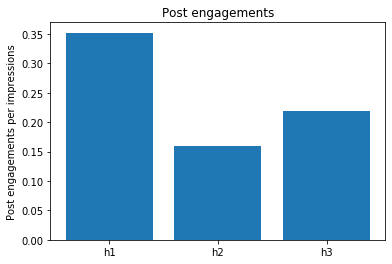

In [95]:
target = "Post engagements"
kp.make_barchart(data, target)
plt.savefig("Post_engagements_barchart.png")

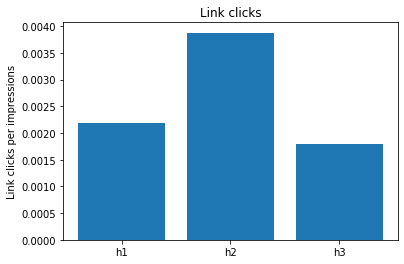

In [96]:
target = "Link clicks"
kp.make_barchart(data, target)
plt.savefig("Link_clicks_barchart.png")

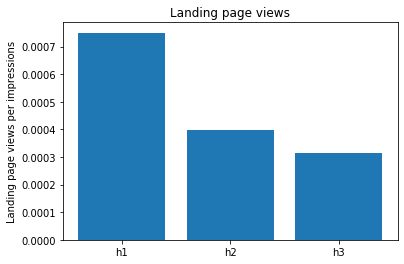

In [97]:
target = "Landing page views"
kp.make_barchart(data, target)
plt.savefig("Landing_page_views.png")

In [20]:
data.columns

Index(['ad-name', 'target', 'Hypothesis 1', 'Hypothesis 2', 'Hypothesis 3',
       'Teaser', 'English', 'French', 'video', 'campaign 1', 'campaign 2',
       'campaign 3', 'initial exposure', 'returning after interaction',
       'returning after video', 'entrepreneur (audience)', 'Cost',
       'Impressions', 'Post shares', 'Post reactions', 'Post comments',
       'Link clicks', 'Post engagements', 'Landing page views',
       'Three-second video views', 'Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%',
       'is_video', 'is_portrait', 'name', 'language', 'hypothesis'],
      dtype='object')

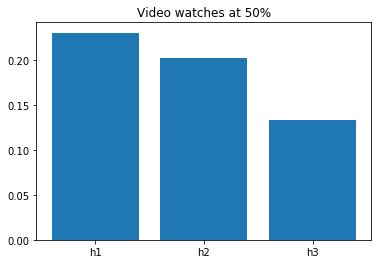

In [67]:
kp.make_barchart(data,'Video watches at 50%', selection={'is_video':True, "age":"65+"})

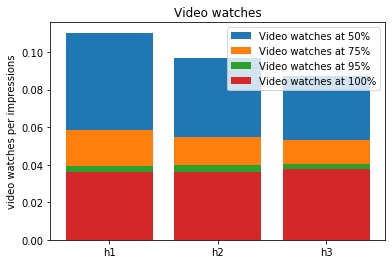

In [98]:
columns = ['Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%']
selection = {'is_video':True}
kp.make_multi_barchart(data, columns, selection, title="Video watches")
plt.savefig("videowatches.png")

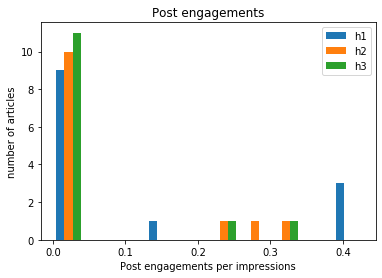

In [90]:
kp.make_multi_histogram(data, "Post engagements")
plt.savefig("post_engagements_histogram.png")